In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize

figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi']=300


There are existis 3 types of random variables.

**Descrete** - that type of variable can have values of specific set of values - number of people, film raiting.

**Continuous** can take any values  like temperature, speed

**Mixed** - mixed values can have many both Descrete and Continous type of values

## Descrete
------------



Random variable Z - descrete then it's destribution is called Probability Mass Function.

To know what is probability of descrete variable take values $k$ denoted $P(Z=k)$
\begin{align}
P(Z=k)
\end{align}

Example of such Porbability Mass Functions is Poisson Destribution:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots, \; \; \lambda \in \mathbb{R}_{>0} $$

$\lambda$ - is mean of the Poisson distribution, more $\lambda$ more likely $P(Z)$ will take highre values.
$\lambda$ - is responsible for distribution's shape and could be called as _intensity_ of the distribution.

$k$ should be strictly >= 0,1,2,3

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$


The Poisson distribution can be derived as the limit of a binomial distribution as the number of trials, $n$, approaches infinity and the probability of success on each trial, $p$, approaches zero in such a way that $np = \lambda$.

\begin{align}
f(k) = \frac{\exp(-\mu)\times\mu^k}{k!}
\end{align}

In [4]:
def fact(k):
    if (k==0):
        return 1
    ret =1
    for i in range(1, k+1):
        ret*=i
    return ret

fact(5), fact(0), fact(1)

(120, 1, 1)

In [5]:
def poisson(k, l=1):
    if type(k) in [int, np.int64]:
        return (np.power(l, k)*np.exp(-l))/fact(k)
    if type(k) in [list, np.ndarray]:
        return [poisson(i, l) for i in k]

In [6]:
poisson(5, 10)

0.03783327480207071

In [7]:
poisson([2,1], 2)

[0.2706705664732254, 0.2706705664732254]

In [8]:
import scipy.stats as stats
stats.poisson.pmf(1, 1)

0.36787944117144233

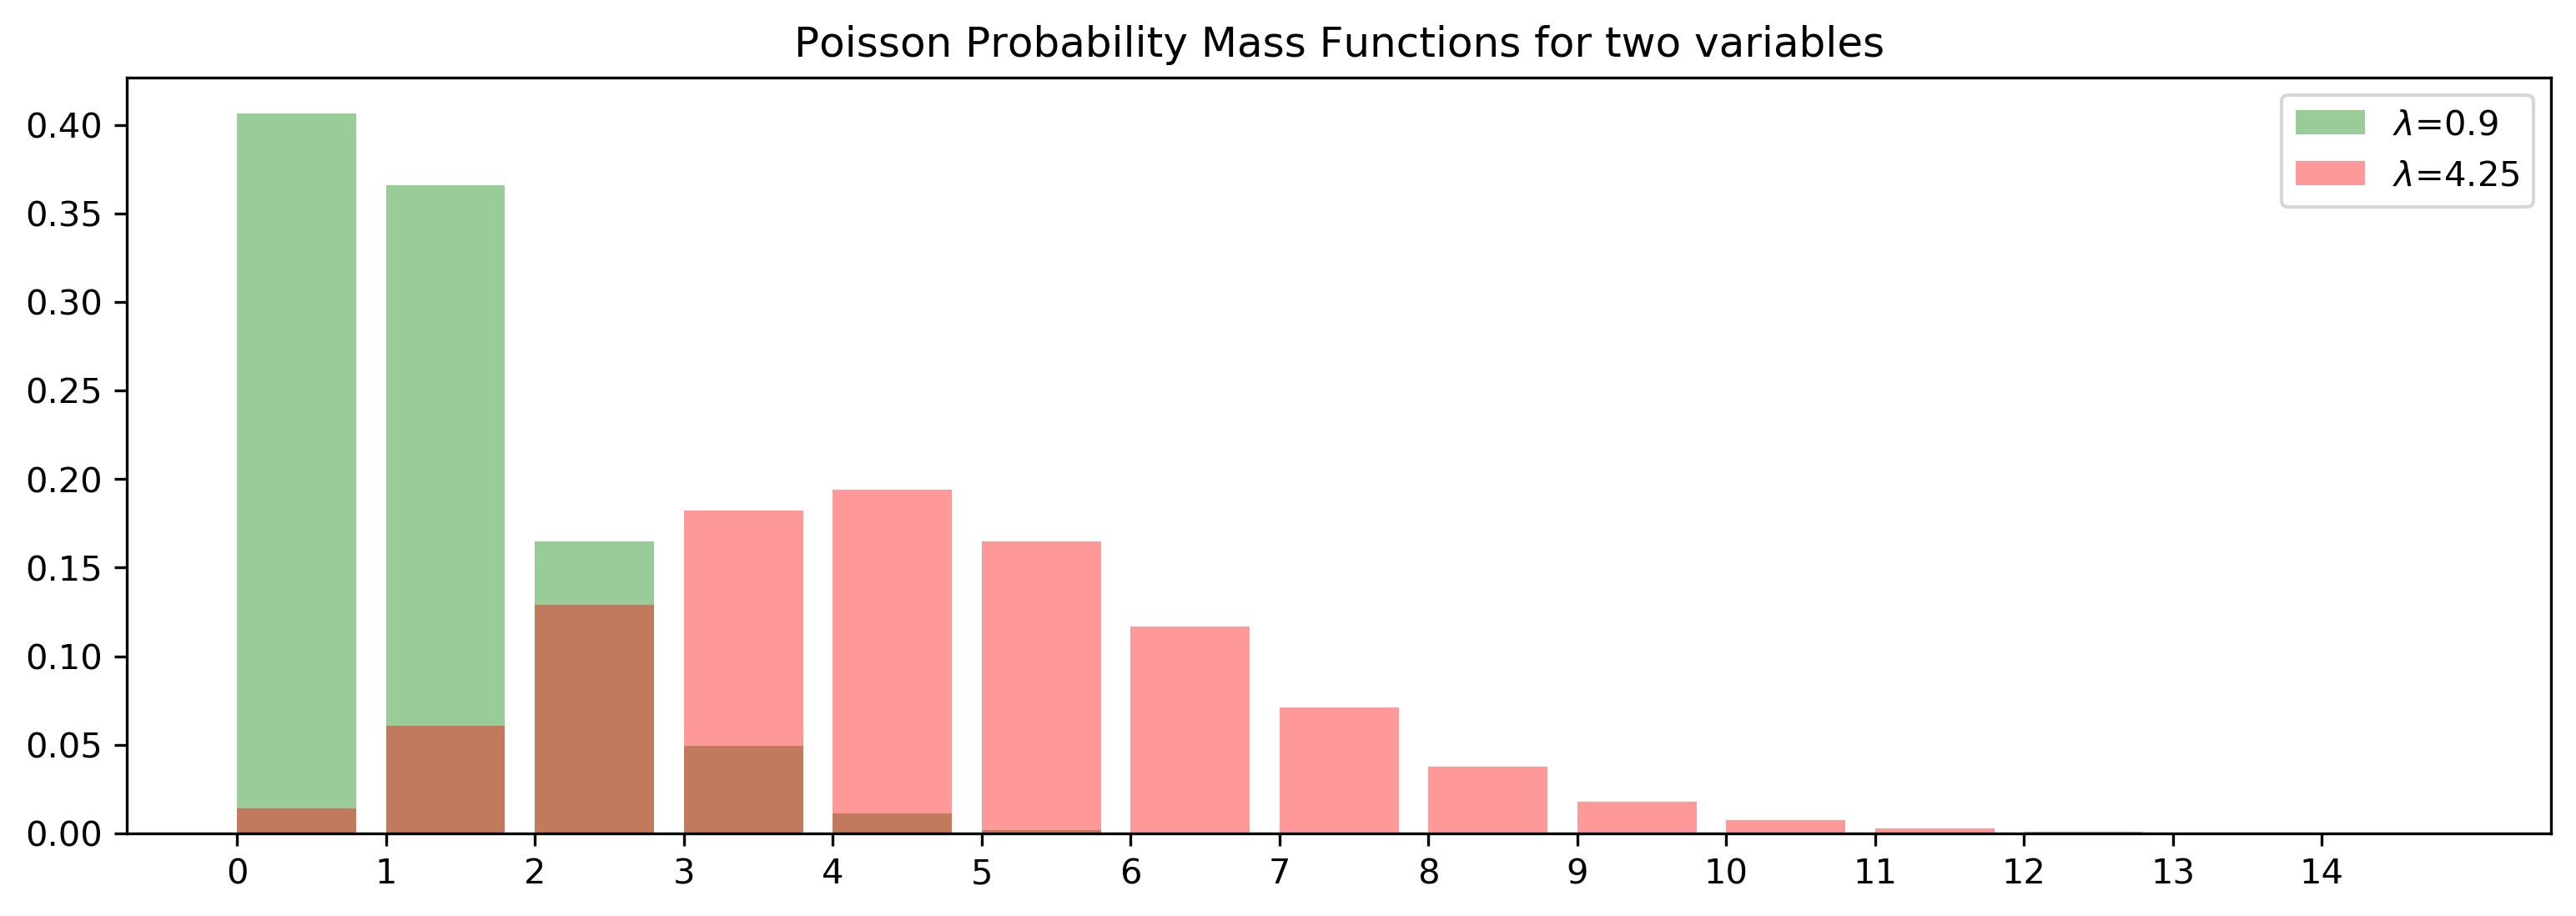

In [9]:
a = np.arange(15)

lambdas=[.9,1.5, 4.25]
plt.xticks(a-0.4, a)
plt.bar(a, poisson(a, lambdas[0]), lw="3", alpha=0.4, color='green', label='$\lambda$='+str(lambdas[0]))
# plt.bar(a, poisson(a, lambdas[1]), lw="3", alpha=0.4, color='red', label='$\lambda$='+str(lambdas[1]))
plt.bar(a, poisson(a, lambdas[2]), lw="3",alpha=0.4, color='red', label='$\lambda$='+str(lambdas[2]))
plt.title('Poisson Probability Mass Functions for two variables')
plt.legend()
plt.show()

Poisson destribution can be used to aproximate Binomial probability for large $n$ and small $p$

In [10]:
la_=8
e_=np.array([np.power(la_, k)*np.exp(-la_)/fact(k) for k in range(25)])

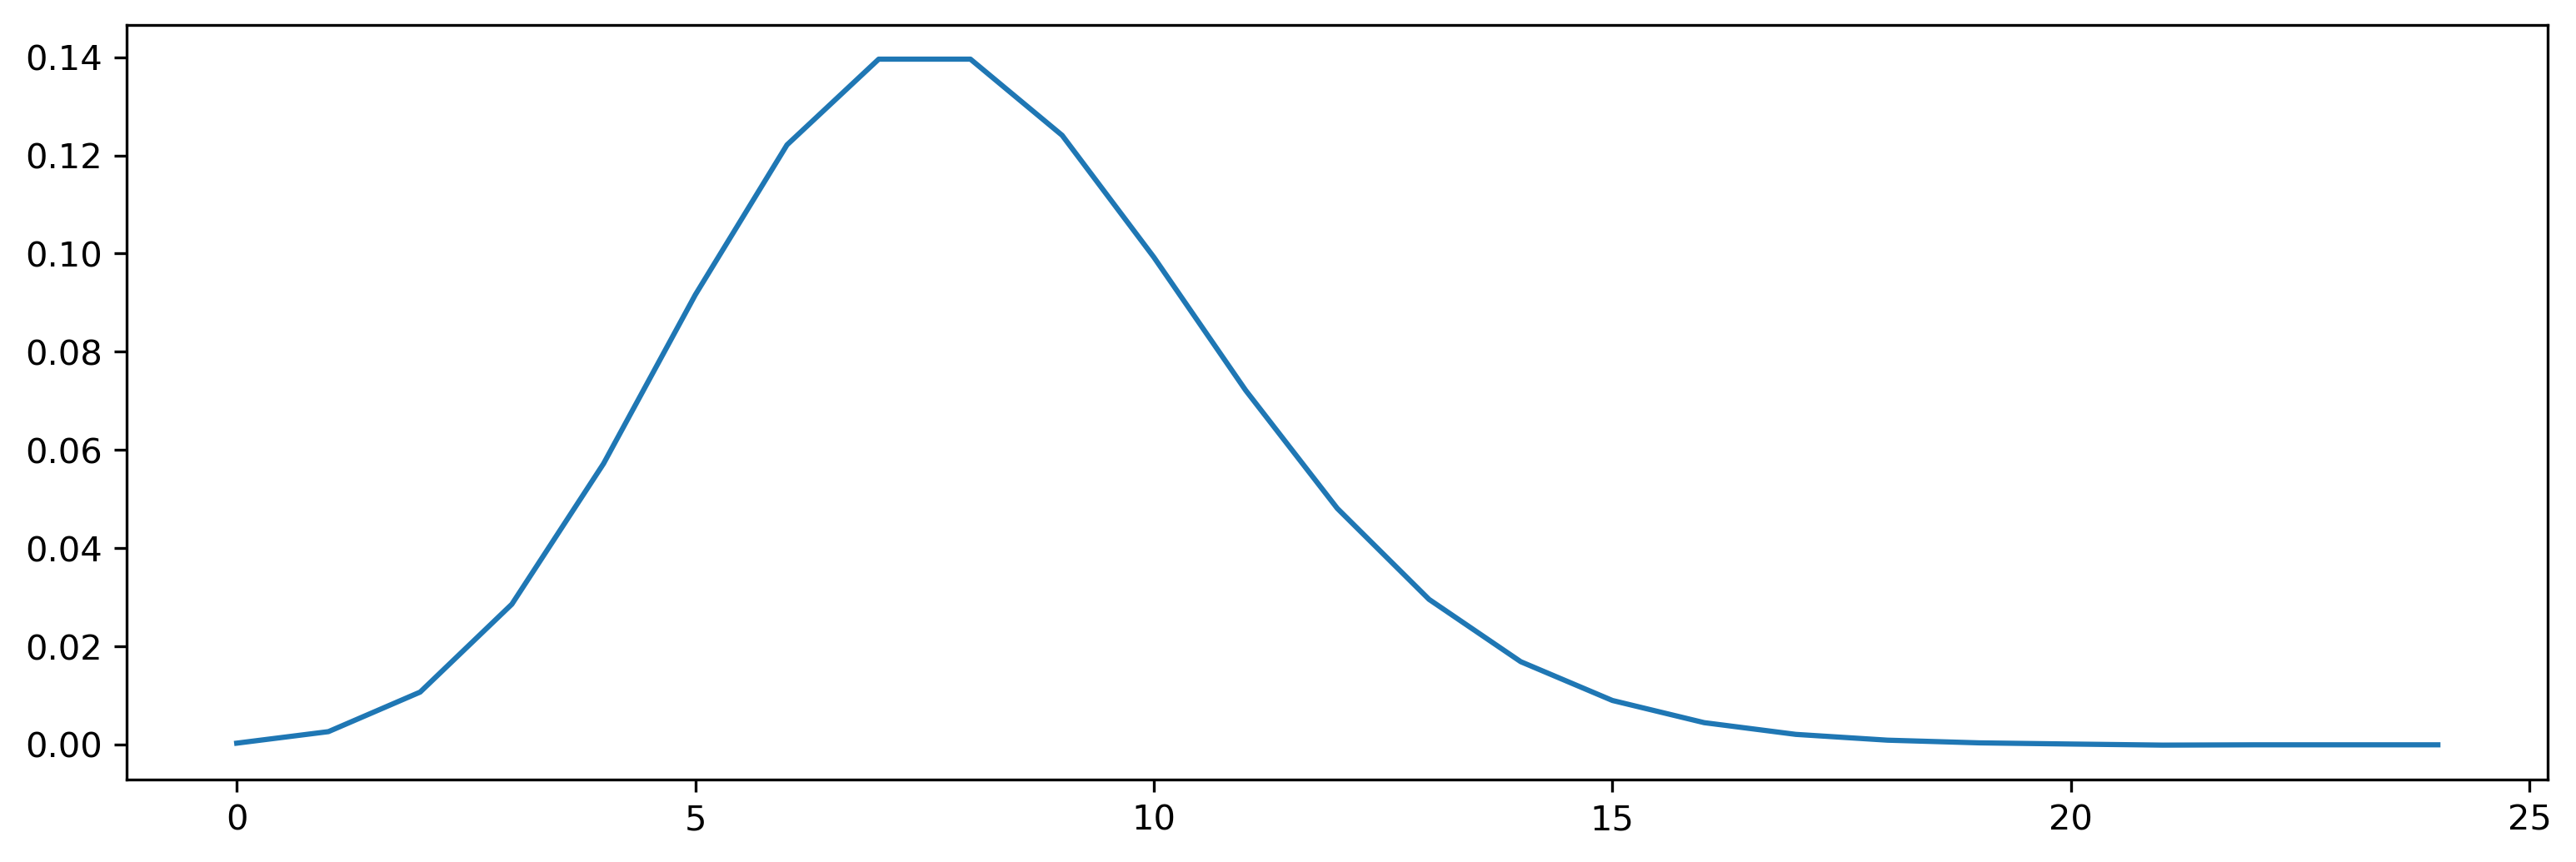

In [11]:
plt.plot(e_)

In [12]:
np.sum(e_)

0.9998454715254892

In [13]:
np.exp(8)

2980.9579870417283

In [14]:
np.log(2980.9579870417283)

8.0

In [59]:
import pymc3 as pm
from pymc3 import sample, plot_posterior_predictive_glm, traceplot

In [23]:
count_data=np.loadtxt('./data/txtdata.csv')
count_data

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

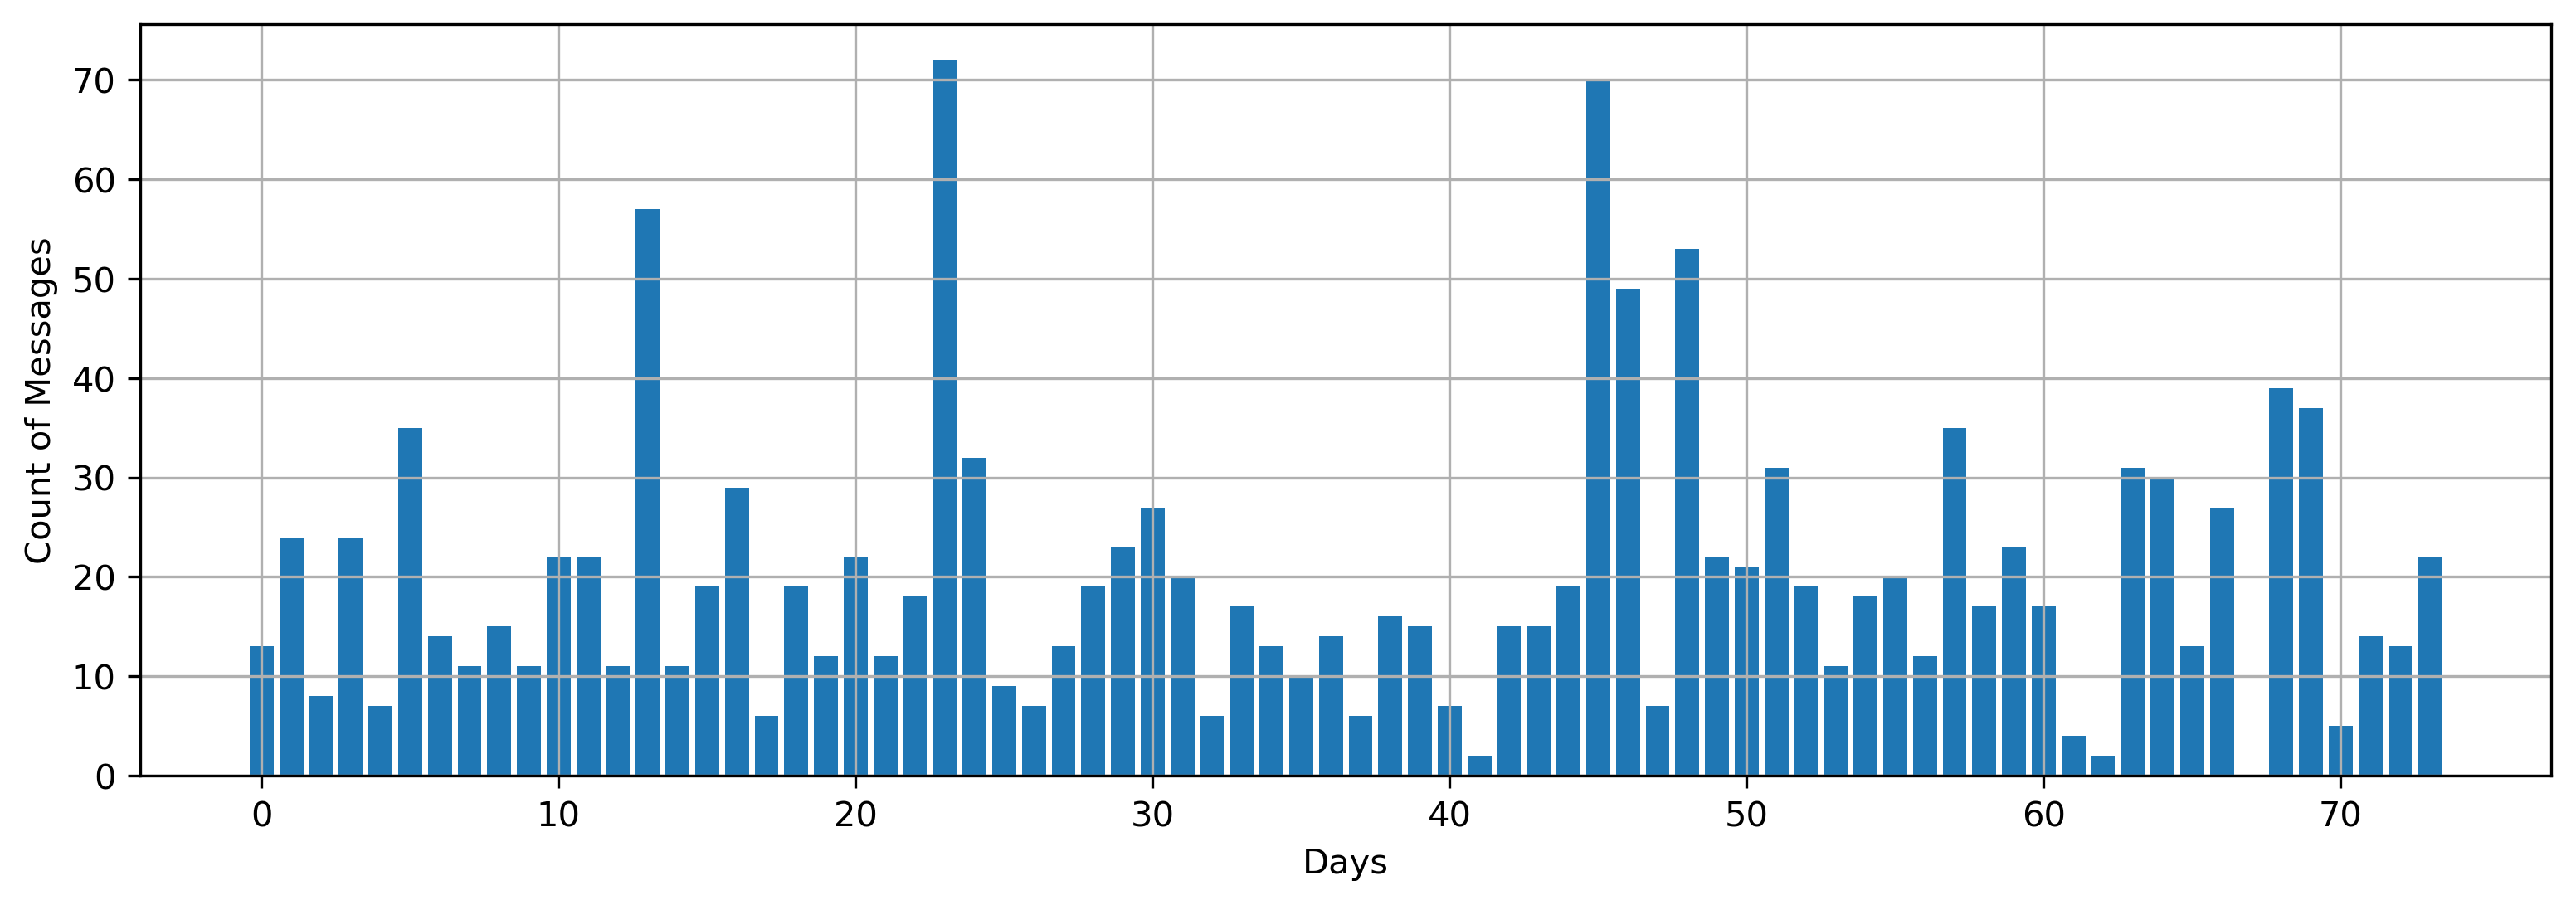

In [33]:
n_text_data=len(count_data)
plt.xlabel('Days')
plt.ylabel('Count of Messages')
plt.grid(True)
plt.bar(np.arange(n_text_data), count_data)
plt.show()

In [47]:
alpha=1.0/count_data.mean()


with pm.Model() as model:
    lambda_1 = pm.Exponential("Lambda 1", alpha)
    lambda_2 = pm.Exponential("Lambda 2", alpha)
    
    tau = pm.DiscreteUniform('tau', lower=0, upper=n_text_data)
#     @pm.deterministic
    def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
        out = np.zeros(n_text_data)
        out[:tau] = lambda_1
        out[tau:] = lambda_2
        return out
    boservation = pm.Poisson('obs', mu= lambda_1,  observed=count_data)
    trace_lasso = sample(draws=40000, cores=10, init='adapt_diag')

#     y = pm.Poisson('y', mu=np.exp(theta), observed=mx_en['nsneeze'].values)


Multiprocess sampling (10 chains in 10 jobs)
CompoundStep
>NUTS: [Lambda 2, Lambda 1]
>Metropolis: [tau]
Sampling 10 chains, 45 divergences: 100%|██████████| 405000/405000 [01:16<00:00, 5260.41draws/s]
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8895184688520769, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` 

In [52]:
dir(trace_lasso)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attrs',
 '_report',
 '_slice',
 '_straces',
 'add_values',
 'chains',
 'get_sampler_stats',
 'get_values',
 'nchains',
 'point',
 'points',
 'remove_values',
 'report',
 'stat_names',
 'varnames']

/anaconda3/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/anaconda3/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/anaconda3/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/anaconda3/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

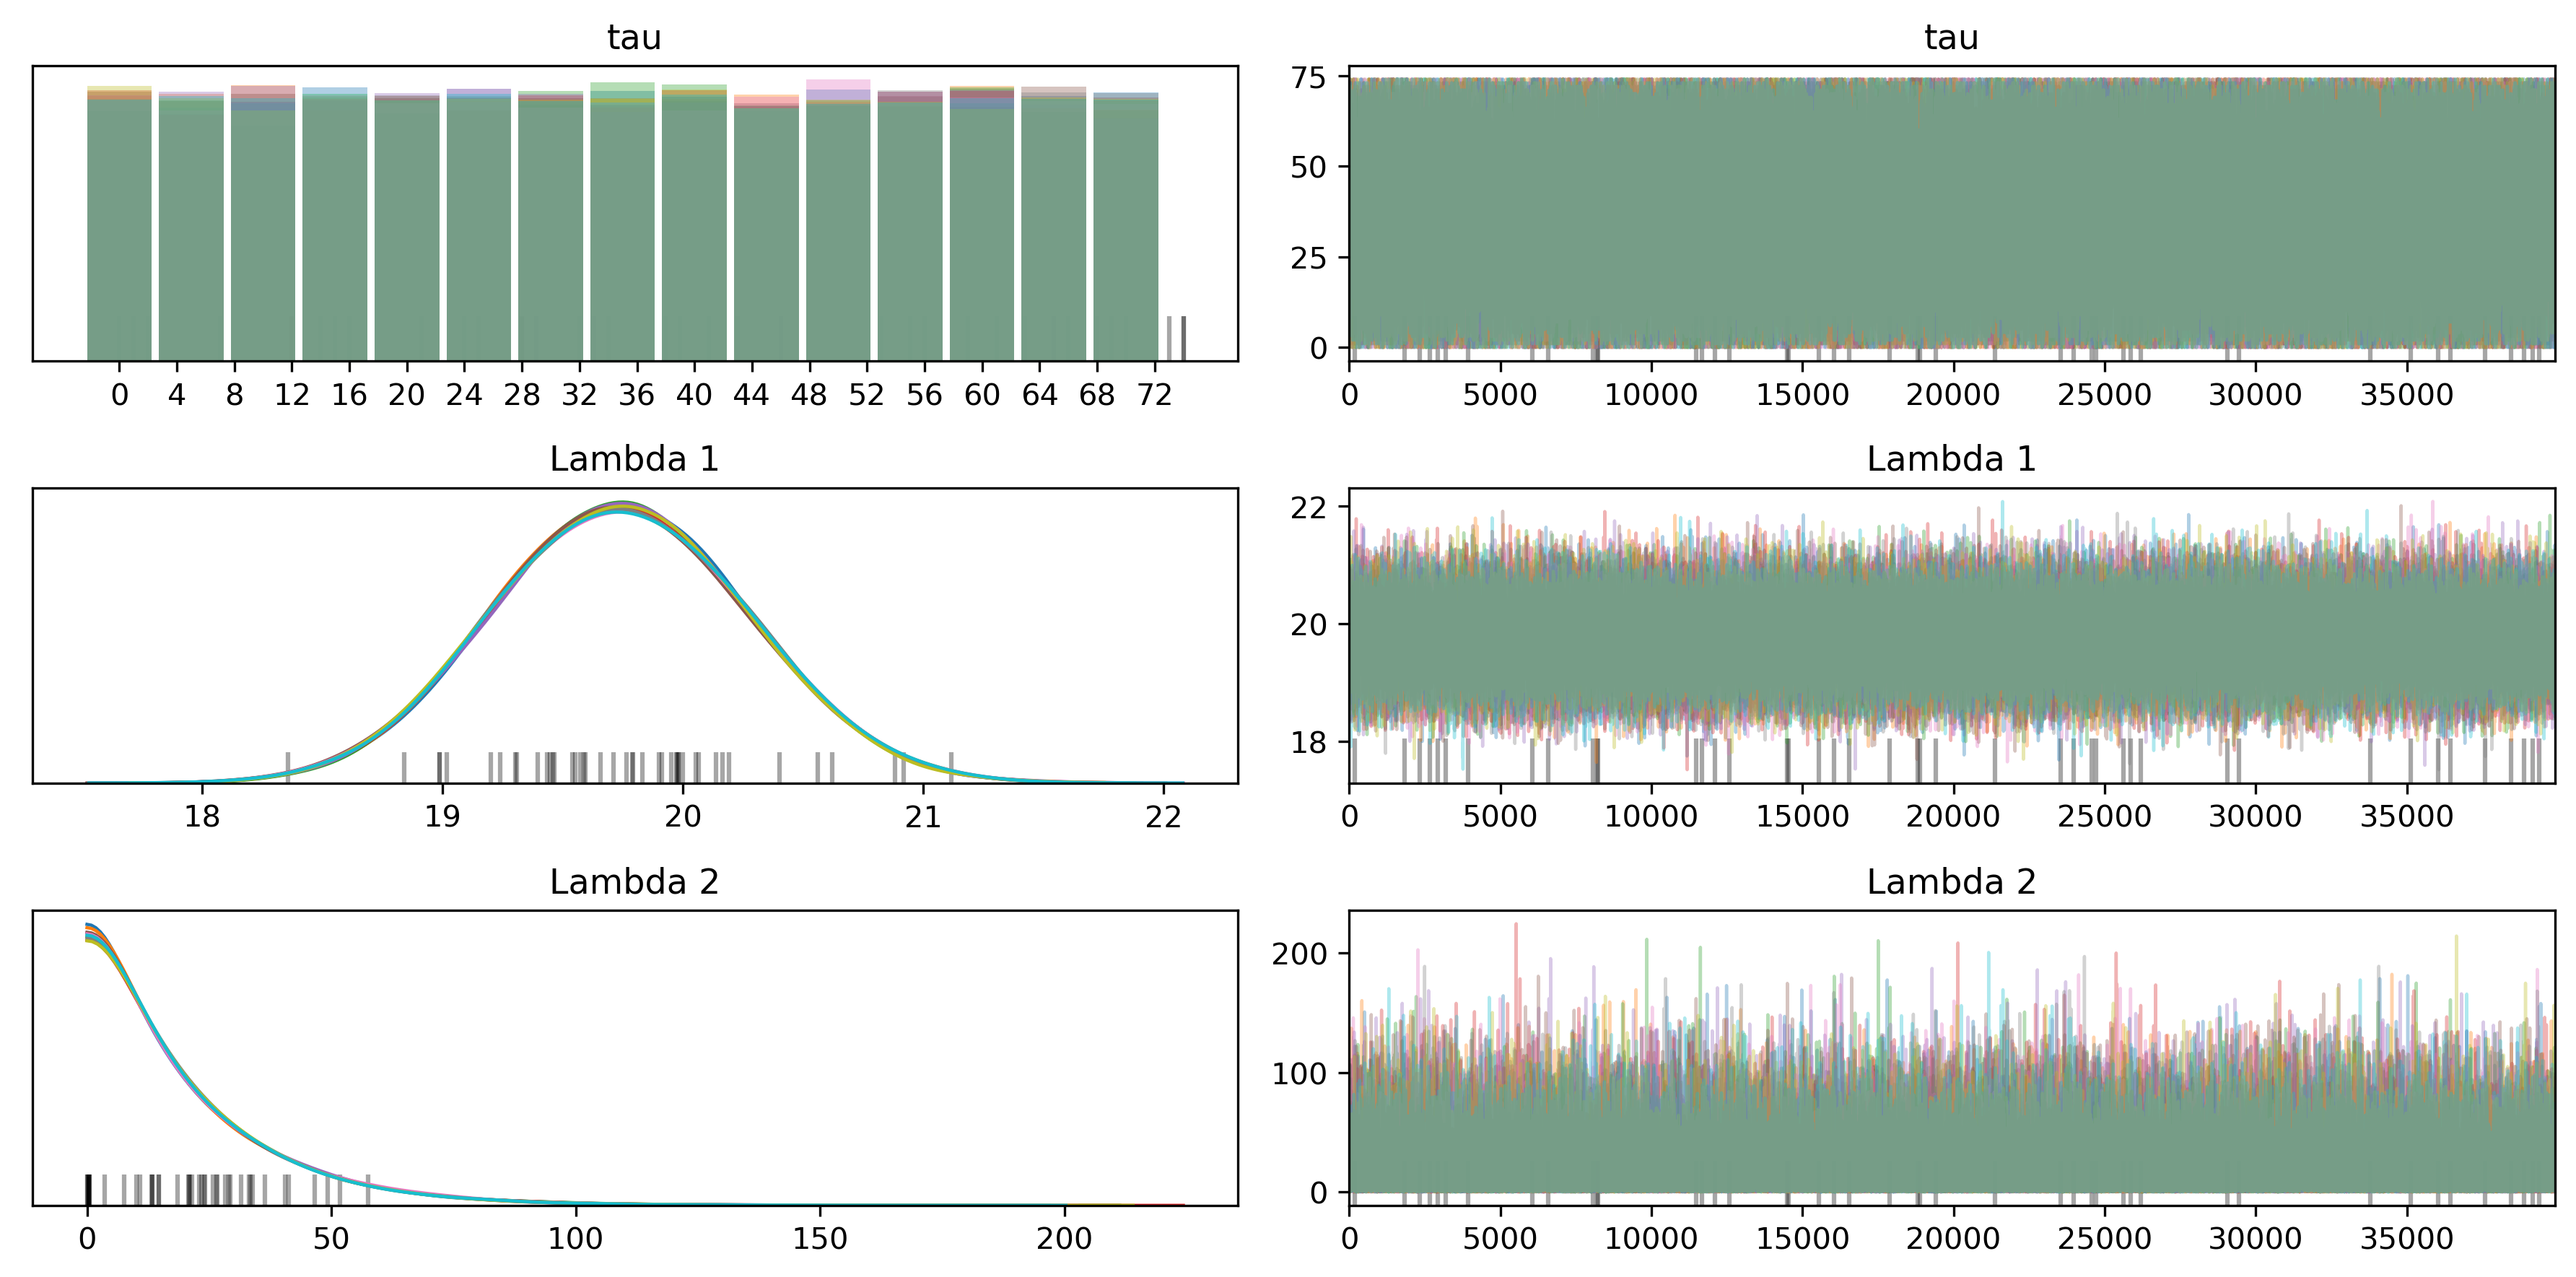

In [60]:
traceplot(trace_lasso[100:])
plt.tight_layout();

In [57]:
model.l

tau

In [50]:
plot_posterior_predictive_glm(trace_lasso)


KeyError: 'Intercept'

Litriture:
[Chapter1_Introduction](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_TFP.ipynb)

[Wikipedia - Computational methods](https://en.wikipedia.org/wiki/Poisson_distribution#Computational_methods)